In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
from util import bullish_sequence, bullish_candlestick_patterns
from src.asset_selector import AssetSelector
from src.indicators import Indicators
from src.predictor import Predictor
from sklearn.cluster import KMeans
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import configparser
import pandas as pd
import numpy as np
import sys
import os

py.init_notebook_mode(connected=True)
config = configparser.ConfigParser()

try:
    config.read(os.path.relpath("config.ini"))
except FileExistsError as e:
    print("FileExistsError: {}".format(e))
    sys.exit(1)


alpaca_api = tradeapi.REST(
    base_url    = config["alpaca"]["APCA_API_BASE_URL"],
    key_id      = config["alpaca"]["APCA_API_KEY_ID"],
    secret_key  = config["alpaca"]["APCA_API_SECRET_KEY"],
    api_version = config["alpaca"]["VERSION"]
)

/home/ben/anaconda3/envs/alpaca_test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ben/anaconda3/envs/alpaca_test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ben/anaconda3/envs/alpaca_test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ben/anaconda3/envs/alpaca_test/lib

In [2]:
assets      = AssetSelector(alpaca_api, edgar_token=None).bullish_candlesticks(64, 20)

Ticker: FHN		Poolsize: 20		Result Length: 1
Ticker: AMN		Poolsize: 20		Result Length: 2
Ticker: MSCI		Poolsize: 20		Result Length: 3
Ticker: FMBI		Poolsize: 20		Result Length: 4
Ticker: NNN		Poolsize: 20		Result Length: 5
Ticker: WSC		Poolsize: 20		Result Length: 6
Ticker: CPLG		Poolsize: 20		Result Length: 7
Ticker: BTN		Poolsize: 20		Result Length: 8
Ticker: VICI		Poolsize: 20		Result Length: 9
Ticker: FIS		Poolsize: 20		Result Length: 10
Ticker: AFIN		Poolsize: 20		Result Length: 11
Ticker: VALE		Poolsize: 20		Result Length: 12
Ticker: IIVI		Poolsize: 20		Result Length: 13
Ticker: PICO		Poolsize: 20		Result Length: 14
Ticker: TEVA		Poolsize: 20		Result Length: 15
Ticker: MYOK		Poolsize: 20		Result Length: 16
Ticker: ZUO		Poolsize: 20		Result Length: 17
Ticker: BOMN		Poolsize: 20		Result Length: 18
Ticker: CONE		Poolsize: 20		Result Length: 19
Ticker: RCII		Poolsize: 20		Result Length: 20


In [3]:
indicators  = Indicators(alpaca_api, assets).get_cluster()

In [4]:
predictions = Predictor(indicators)

In [5]:
# get the first tradeable asset in the collection of indicators
ticker_index = list(indicators.keys())[0]
indicators[ticker_index].iloc[-20:]

,time,open,high,low,close,volume,up_move,down_move,DMp,DMm,...,macd_ptc,signal_ptc,vwmacd_ptc,vwsignal_ptc,mfi_ptc,stoch_ptc,vzo_ptc,adx_ptc,apz_u_ptc,apz_l_ptc
43,2019-10-03 00:00:00-04:00,15.85,15.900,15.620,15.840,1723667,-0.020,0.090,0.000,0.090,...,-0.572003,-0.160347,-0.513136,-0.157415,-0.192392,0.196703,0.084686,NaN,-0.003674,-0.003983
44,2019-10-04 00:00:00-04:00,15.87,16.085,15.660,16.050,2524738,0.185,-0.040,0.185,0.000,...,-0.294643,-0.166689,-0.404821,-0.169921,0.208655,0.954545,-0.393356,NaN,-0.000884,-0.001244
45,2019-10-07 00:00:00-04:00,16.01,16.110,15.880,15.890,1542241,0.025,-0.220,0.025,0.000,...,-1.164875,-0.206599,-1.067275,-0.202445,0.119521,-0.372093,0.167205,NaN,-0.002536,-0.002817
46,2019-10-08 00:00:00-04:00,15.76,15.760,15.560,15.590,1879139,-0.350,0.320,0.000,0.320,...,14.937677,-0.332432,41.926210,-0.331251,-0.147902,-0.895762,0.161424,NaN,-0.005463,-0.005734
47,2019-10-09 00:00:00-04:00,15.72,15.720,15.490,15.535,1656889,-0.040,0.070,0.000,0.070,...,0.831100,-0.563240,0.824361,-0.558044,-0.186750,0.399038,0.111808,NaN,-0.005402,-0.005540
48,2019-10-10 00:00:00-04:00,15.63,15.810,15.590,15.770,2218400,0.090,-0.100,0.090,0.000,...,0.090378,-1.106824,0.174414,-1.151419,0.264990,5.222222,-0.399877,NaN,-0.002281,-0.002046
49,2019-10-11 00:00:00-04:00,15.97,16.080,15.910,15.930,1951637,0.270,-0.320,0.270,0.000,...,-0.105159,7.396201,-0.065610,5.671053,0.166066,0.571429,-0.509103,NaN,-0.000393,0.000202
50,2019-10-14 00:00:00-04:00,15.82,16.000,15.780,15.900,1326542,-0.080,0.130,0.000,0.130,...,-0.070183,0.641219,-0.022797,0.660012,0.038096,-0.068182,0.470627,NaN,-0.000710,-0.000081
51,2019-10-15 00:00:00-04:00,15.92,16.165,15.870,16.130,3812755,0.165,-0.090,0.165,0.000,...,-0.345422,0.135507,-0.500188,0.058938,0.072119,0.560976,-1.202312,NaN,0.001849,0.002554
52,2019-10-16 00:00:00-04:00,15.50,16.090,15.310,15.570,4371445,-0.075,0.560,0.000,0.560,...,0.598967,0.272445,1.281281,0.357835,-0.262654,-0.653689,-5.127161,NaN,-0.003804,-0.004695


In [6]:
kmeans = KMeans(n_clusters=2)

In [7]:
n_indicators                = pd.DataFrame()
n_indicators["open"]        = indicators[ticker_index]["open"].iloc[-20:]
n_indicators["high"]        = indicators[ticker_index]["high"].iloc[-20:]
n_indicators["low"]         = indicators[ticker_index]["low"].iloc[-20:]
n_indicators["close"]       = indicators[ticker_index]["close"].iloc[-20:]
n_indicators["macd"]        = indicators[ticker_index]["macd"].iloc[-20:]
n_indicators["signal"]      = indicators[ticker_index]["signal"].iloc[-20:]
n_indicators["mfi"]         = indicators[ticker_index]["mfi"].iloc[-20:]
n_indicators["bb_up"]       = indicators[ticker_index]["bb_up"].iloc[-20:]
n_indicators["bb_low"]      = indicators[ticker_index]["bb_low"].iloc[-20:]
n_indicators["vzo"]         = indicators[ticker_index]["vzo"].iloc[-20:]
n_indicators["apz_u"]       = indicators[ticker_index]["apz_u"].iloc[-20:]
n_indicators["apz_l"]       = indicators[ticker_index]["apz_l"].iloc[-20:]
n_indicators["stoch"]       = indicators[ticker_index]["stoch"].iloc[-20:]

n1_indicators               = pd.DataFrame()
ticker_index                = list(indicators.keys())[1]

n1_indicators["open"]       = indicators[ticker_index]["open"].iloc[-20:]
n1_indicators["high"]       = indicators[ticker_index]["high"].iloc[-20:]
n1_indicators["low"]        = indicators[ticker_index]["low"].iloc[-20:]
n1_indicators["close"]      = indicators[ticker_index]["close"].iloc[-20:]
n1_indicators["macd"]       = indicators[ticker_index]["macd"].iloc[-20:]
n1_indicators["signal"]     = indicators[ticker_index]["signal"].iloc[-20:]
n1_indicators["mfi"]        = indicators[ticker_index]["mfi"].iloc[-20:]
n1_indicators["bb_up"]      = indicators[ticker_index]["bb_up"].iloc[-20:]
n1_indicators["bb_low"]     = indicators[ticker_index]["bb_low"].iloc[-20:]
n1_indicators["vzo"]        = indicators[ticker_index]["vzo"].iloc[-20:]
n1_indicators["apz_u"]      = indicators[ticker_index]["apz_u"].iloc[-20:]
n1_indicators["apz_l"]      = indicators[ticker_index]["apz_l"].iloc[-20:]
n1_indicators["stoch"]      = indicators[ticker_index]["stoch"].iloc[-20:]

n2_indicators               = pd.DataFrame()
ticker_index                = list(indicators.keys())[2]

n2_indicators["open"]       = indicators[ticker_index]["open"].iloc[-20:]
n2_indicators["high"]       = indicators[ticker_index]["high"].iloc[-20:]
n2_indicators["low"]        = indicators[ticker_index]["low"].iloc[-20:]
n2_indicators["close"]      = indicators[ticker_index]["close"].iloc[-20:]
n2_indicators["macd"]       = indicators[ticker_index]["macd"].iloc[-20:]
n2_indicators["signal"]     = indicators[ticker_index]["signal"].iloc[-20:]
n2_indicators["mfi"]        = indicators[ticker_index]["mfi"].iloc[-20:]
n2_indicators["bb_up"]      = indicators[ticker_index]["bb_up"].iloc[-20:]
n2_indicators["bb_low"]     = indicators[ticker_index]["bb_low"].iloc[-20:]
n2_indicators["vzo"]        = indicators[ticker_index]["vzo"].iloc[-20:]
n2_indicators["apz_u"]      = indicators[ticker_index]["apz_u"].iloc[-20:]
n2_indicators["apz_l"]      = indicators[ticker_index]["apz_l"].iloc[-20:]
n2_indicators["stoch"]      = indicators[ticker_index]["stoch"].iloc[-20:]

n3_indicators               = pd.DataFrame()
ticker_index                = list(indicators.keys())[3]

n3_indicators["open"]       = indicators[ticker_index]["open"].iloc[-20:]
n3_indicators["high"]       = indicators[ticker_index]["high"].iloc[-20:]
n3_indicators["low"]        = indicators[ticker_index]["low"].iloc[-20:]
n3_indicators["close"]      = indicators[ticker_index]["close"].iloc[-20:]
n3_indicators["macd"]       = indicators[ticker_index]["macd"].iloc[-20:]
n3_indicators["signal"]     = indicators[ticker_index]["signal"].iloc[-20:]
n3_indicators["mfi"]        = indicators[ticker_index]["mfi"].iloc[-20:]
n3_indicators["bb_up"]      = indicators[ticker_index]["bb_up"].iloc[-20:]
n3_indicators["bb_low"]     = indicators[ticker_index]["bb_low"].iloc[-20:]
n3_indicators["vzo"]        = indicators[ticker_index]["vzo"].iloc[-20:]
n3_indicators["apz_u"]      = indicators[ticker_index]["apz_u"].iloc[-20:]
n3_indicators["apz_l"]      = indicators[ticker_index]["apz_l"].iloc[-20:]
n3_indicators["stoch"]      = indicators[ticker_index]["stoch"].iloc[-20:]

n4_indicators               = pd.DataFrame()
ticker_index                = list(indicators.keys())[4]

n4_indicators["open"]       = indicators[ticker_index]["open"].iloc[-20:]
n4_indicators["high"]       = indicators[ticker_index]["high"].iloc[-20:]
n4_indicators["low"]        = indicators[ticker_index]["low"].iloc[-20:]
n4_indicators["close"]      = indicators[ticker_index]["close"].iloc[-20:]
n4_indicators["macd"]       = indicators[ticker_index]["macd"].iloc[-20:]
n4_indicators["signal"]     = indicators[ticker_index]["signal"].iloc[-20:]
n4_indicators["mfi"]        = indicators[ticker_index]["mfi"].iloc[-20:]
n4_indicators["bb_up"]      = indicators[ticker_index]["bb_up"].iloc[-20:]
n4_indicators["bb_low"]     = indicators[ticker_index]["bb_low"].iloc[-20:]
n4_indicators["vzo"]        = indicators[ticker_index]["vzo"].iloc[-20:]
n4_indicators["apz_u"]      = indicators[ticker_index]["apz_u"].iloc[-20:]
n4_indicators["apz_l"]      = indicators[ticker_index]["apz_l"].iloc[-20:]
n4_indicators["stoch"]      = indicators[ticker_index]["stoch"].iloc[-20:]

In [8]:
kmeans.fit(n_indicators)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
kmeans.cluster_centers_

array([[ 1.60088889e+01,  1.61794444e+01,  1.59116667e+01,
         1.60938889e+01, -2.52120894e-02, -4.81560641e-02,
         5.83519118e+01,  1.64089368e+01,  1.53886743e+01,
         1.44980336e+01,  1.64762771e+01,  1.52887642e+01,
         7.97047951e+01],
       [ 1.57400000e+01,  1.58827273e+01,  1.55854545e+01,
         1.57295455e+01, -5.24158506e-02,  8.17147895e-03,
         4.13647046e+01,  1.66067091e+01,  1.56129727e+01,
        -3.47884994e+01,  1.65590560e+01,  1.53639758e+01,
         2.47500148e+01]])

In [10]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

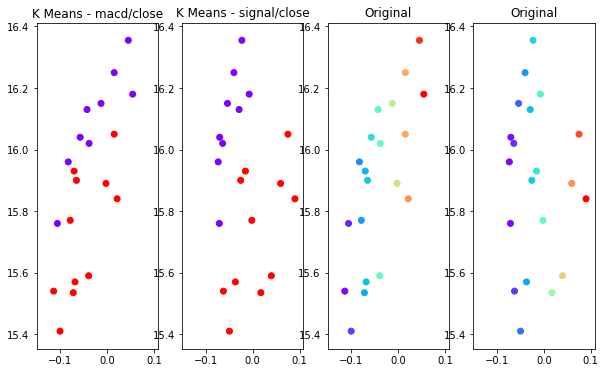

In [11]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=False, figsize=(10,6))
ax1.set_title('K Means - macd/close')
ax1.scatter(n_indicators["macd"], n_indicators["close"], c=kmeans.labels_, cmap="rainbow")
ax2.set_title("K Means - signal/close")
ax2.scatter(n_indicators["signal"], n_indicators["close"], c=kmeans.labels_, cmap="rainbow")
ax3.set_title("Original")
ax3.scatter(n_indicators["macd"], n_indicators["close"], c=n_indicators["macd"], cmap="rainbow")
ax4.set_title("Original")
ax4.scatter(n_indicators["signal"], n_indicators["close"], c=n_indicators["signal"], cmap="rainbow")

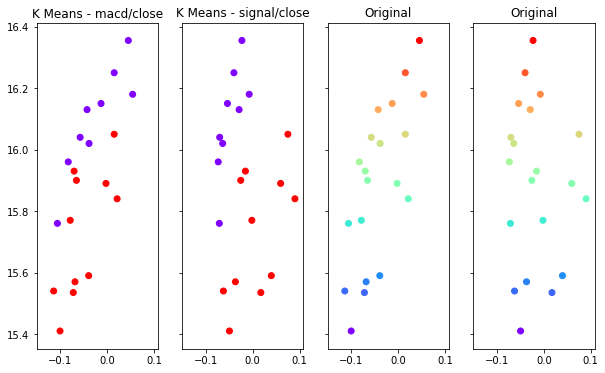

In [12]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(10,6))
ax1.set_title('K Means - macd/close')
ax1.scatter(n_indicators["macd"], n_indicators["close"], c=kmeans.labels_, cmap="rainbow")
ax2.set_title("K Means - signal/close")
ax2.scatter(n_indicators["signal"], n_indicators["close"], c=kmeans.labels_, cmap="rainbow")
ax3.set_title("Original")
ax3.scatter(n_indicators["macd"], n_indicators["close"], c=n_indicators["close"], cmap="rainbow")
ax4.set_title("Original")
ax4.scatter(n_indicators["signal"], n_indicators["close"], c=n_indicators["close"], cmap="rainbow")

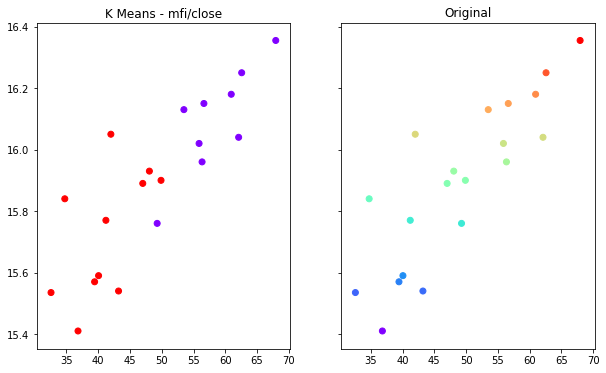

In [13]:
f, (ax3, ax4) = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10,6))
ax3.set_title('K Means - mfi/close')
ax3.scatter(n_indicators["mfi"], n_indicators["close"], c=kmeans.labels_, cmap="rainbow")
ax4.set_title("Original")
ax4.scatter(n_indicators["mfi"], n_indicators["close"], c=n_indicators["close"], cmap="rainbow")

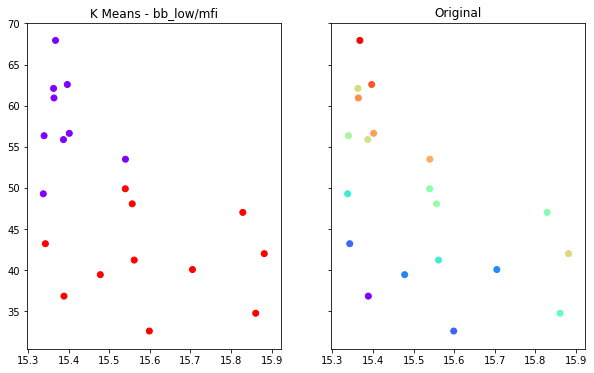

In [14]:
f, (ax5, ax6) = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10,6))
ax5.set_title('K Means - bb_low/mfi')
ax5.scatter(n_indicators["bb_low"], n_indicators["mfi"], c=kmeans.labels_, cmap="rainbow")
ax6.set_title("Original")
ax6.scatter(n_indicators["bb_low"], n_indicators["mfi"], c=n_indicators["close"], cmap="rainbow")

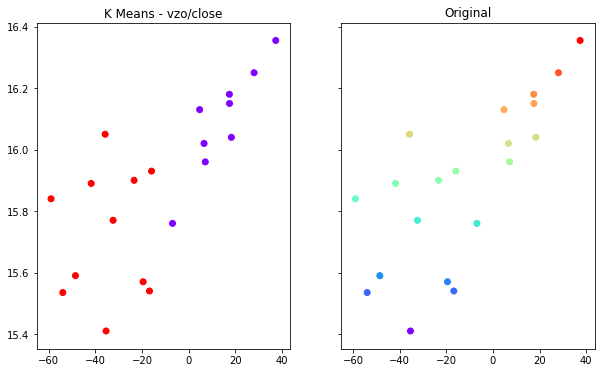

In [15]:
f, (ax7, ax8) = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10,6))
ax7.set_title('K Means - vzo/close')
ax7.scatter(n_indicators["vzo"], n_indicators["close"], c=kmeans.labels_, cmap="rainbow")
ax8.set_title("Original")
ax8.scatter(n_indicators["vzo"], n_indicators["close"], c=n_indicators["close"], cmap="rainbow")

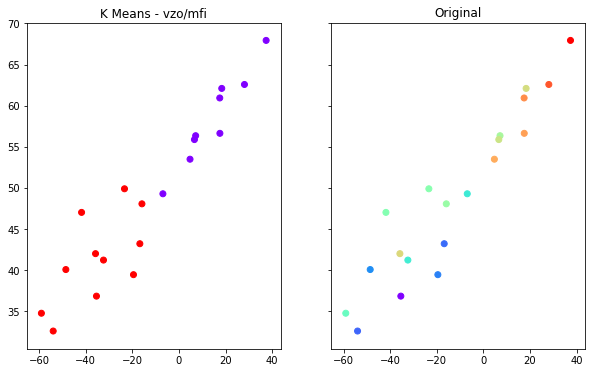

In [16]:
f, (ax9, ax10) = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10,6))
ax9.set_title('K Means - vzo/mfi')
ax9.scatter(n_indicators["vzo"], n_indicators["mfi"], c=kmeans.labels_, cmap="rainbow")
ax10.set_title("Original")
ax10.scatter(n_indicators["vzo"], n_indicators["mfi"], c=n_indicators["close"], cmap="rainbow")

In [17]:
heatmap = go.Heatmap(
    z=n_indicators.iloc[-20:].corr(method='pearson').values,
    x=n_indicators.columns,
    y=n_indicators.columns,
    colorbar=dict(title='Pearson Coefficient'),
)

layout = go.Layout(title="Pearson correlation of indicators")

heatmap['zmax'] = 1.0
heatmap['zmin'] = -1.0

fig = go.Figure(data=[heatmap], layout=layout)
py.iplot(fig)

In [18]:
heatmap = go.Heatmap(
    z=n_indicators.iloc[-20:].pct_change().corr(method='pearson').values,
    x=n_indicators.columns,
    y=n_indicators.columns,
    colorbar=dict(title='Pearson Coefficient'),
)

layout = go.Layout(title="Pearson correlation of indicator percentage changes (first in list)")

heatmap['zmax'] = 1.0
heatmap['zmin'] = -1.0

fig = go.Figure(data=[heatmap], layout=layout)
py.iplot(fig)

In [19]:
heatmap = go.Heatmap(
    z=n1_indicators.iloc[-20:].pct_change().corr(method='pearson').values,
    x=n1_indicators.columns,
    y=n1_indicators.columns,
    colorbar=dict(title='Pearson Coefficient'),
)

layout = go.Layout(title="Pearson correlation of indicator percentage changes (second in list)")

heatmap['zmax'] = 1.0
heatmap['zmin'] = -1.0

fig = go.Figure(data=[heatmap], layout=layout)
py.iplot(fig)

In [20]:
heatmap = go.Heatmap(
    z=n2_indicators.iloc[-20:].pct_change().corr(method='pearson').values,
    x=n2_indicators.columns,
    y=n2_indicators.columns,
    colorbar=dict(title='Pearson Coefficient'),
)

layout = go.Layout(title="Pearson correlation of indicator percentage changes (third in list)")

heatmap['zmax'] = 1.0
heatmap['zmin'] = -1.0

fig = go.Figure(data=[heatmap], layout=layout)
py.iplot(fig)

In [21]:
heatmap = go.Heatmap(
    z=n3_indicators.iloc[-20:].pct_change().corr(method='pearson').values,
    x=n3_indicators.columns,
    y=n3_indicators.columns,
    colorbar=dict(title='Pearson Coefficient'),
)

layout = go.Layout(title="Pearson correlation of indicator percentage changes (fourth in list)")

heatmap['zmax'] = 1.0
heatmap['zmin'] = -1.0

fig = go.Figure(data=[heatmap], layout=layout)
py.iplot(fig)

In [22]:
heatmap = go.Heatmap(
    z=n4_indicators.iloc[-20:].pct_change().corr(method='pearson').values,
    x=n4_indicators.columns,
    y=n4_indicators.columns,
    colorbar=dict(title='Pearson Coefficient'),
)

layout = go.Layout(title="Pearson correlation of indicator percentage changes (fifth in list)")

heatmap['zmax'] = 1.0
heatmap['zmin'] = -1.0

fig = go.Figure(data=[heatmap], layout=layout)
py.iplot(fig)

In [23]:
n_indicators            = pd.DataFrame()
n_indicators["open"]    = indicators[ticker_index]["open"]
n_indicators["high"]    = indicators[ticker_index]["high"]
n_indicators["low"]     = indicators[ticker_index]["low"]
n_indicators["close"]   = indicators[ticker_index]["close"]
n_indicators["macd"]    = indicators[ticker_index]["macd"]
n_indicators["signal"]  = indicators[ticker_index]["signal"]
n_indicators["mfi"]     = indicators[ticker_index]["mfi"]
n_indicators["bb_up"]   = indicators[ticker_index]["bb_up"]
n_indicators["bb_low"]  = indicators[ticker_index]["bb_low"]
n_indicators["vzo"]     = indicators[ticker_index]["vzo"]
n_indicators["apz_u"]   = indicators[ticker_index]["apz_u"]
n_indicators["apz_l"]   = indicators[ticker_index]["apz_l"]
n_indicators["stoch"]   = indicators[ticker_index]["stoch"]

# train models
close_train, close_test     = predictions.get_predictions(n_indicators["close"])
macd_train, macd_test       = predictions.get_predictions(n_indicators["macd"])
signal_train, signal_test   = predictions.get_predictions(n_indicators["signal"])
mfi_train, mfi_test         = predictions.get_predictions(n_indicators["mfi"])
stoch_train, stoch_test     = predictions.get_predictions(n_indicators["stoch"])
vzo_train, vzo_test         = predictions.get_predictions(n_indicators["vzo"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch: 1000 cost= 0.000019546
Epoch: 2000 cost= 0.000019321
Epoch: 3000 cost= 0.000019098
Epoch: 4000 cost= 0.000018877
Epoch: 5000 cost= 0.000018659
Epoch: 6000 cost= 0.000018444
Epoch: 7000 cost= 0.000018230
Epoch: 8000 cost= 0.000018022
Epoch: 9000 cost= 0.000017816
Epoch: 10000 cost= 0.000017613
Epoch: 11000 cost= 0.000017412
Epoch: 12000 cost= 0.000017214
Epoch: 13000 cost= 0.000017018
Epoch: 14000 cost= 0.000016825
Epoch: 15000 cost= 0.000016634
Epoch: 16000 cost= 0.000016445
Epoch: 17000 cost= 0.000016260
Epoch: 18000 cost= 0.000016077
Epoch: 19000 cost= 0.000015897
Epoch: 20000 cost= 0.000015718
Epoch: 1000 cost= nan
Epoch: 2000 cost= nan
Epoch: 3000 cost= nan
Epoch: 4000 cost= nan
Epoch: 5000 cost= nan
Epoch: 6000 cost= nan
Epoch: 7000 cost= nan
Epoch: 8000 cost= nan
Epoch: 9000 cost= nan
Epoch: 10000 cost= nan
Epoch: 11000 cost= nan
Epoch: 12000 cost= nan
Epoch: 13000 cost= nan
Epoch

/home/ben/Projects/trading/cryptoconda/src/predictor.py:69: RuntimeWarning:

invalid value encountered in greater

/home/ben/Projects/trading/cryptoconda/src/predictor.py:76: RuntimeWarning:

invalid value encountered in greater



Epoch: 1000 cost= nan
Epoch: 2000 cost= nan
Epoch: 3000 cost= nan
Epoch: 4000 cost= nan
Epoch: 5000 cost= nan
Epoch: 6000 cost= nan
Epoch: 7000 cost= nan
Epoch: 8000 cost= nan
Epoch: 9000 cost= nan
Epoch: 10000 cost= nan
Epoch: 11000 cost= nan
Epoch: 12000 cost= nan
Epoch: 13000 cost= nan
Epoch: 14000 cost= nan
Epoch: 15000 cost= nan
Epoch: 16000 cost= nan
Epoch: 17000 cost= nan
Epoch: 18000 cost= nan
Epoch: 19000 cost= nan
Epoch: 20000 cost= nan
Epoch: 1000 cost= nan
Epoch: 2000 cost= nan
Epoch: 3000 cost= nan
Epoch: 4000 cost= nan
Epoch: 5000 cost= nan
Epoch: 6000 cost= nan
Epoch: 7000 cost= nan
Epoch: 8000 cost= nan
Epoch: 9000 cost= nan
Epoch: 10000 cost= nan
Epoch: 11000 cost= nan
Epoch: 12000 cost= nan
Epoch: 13000 cost= nan
Epoch: 14000 cost= nan
Epoch: 15000 cost= nan
Epoch: 16000 cost= nan
Epoch: 17000 cost= nan
Epoch: 18000 cost= nan
Epoch: 19000 cost= nan
Epoch: 20000 cost= nan
Epoch: 1000 cost= nan
Epoch: 2000 cost= nan
Epoch: 3000 cost= nan
Epoch: 4000 cost= nan
Epoch: 500

In [24]:
close_test      = close_test[~np.isnan(close_test)]
macd_test       = macd_test[~np.isnan(macd_test)]
signal_test     = signal_test[~np.isnan(signal_test)]
mfi_test        = mfi_test[~np.isnan(mfi_test)]
stoch_test      = stoch_test[~np.isnan(stoch_test)]
vzo_test        = vzo_test[~np.isnan(vzo_test)]

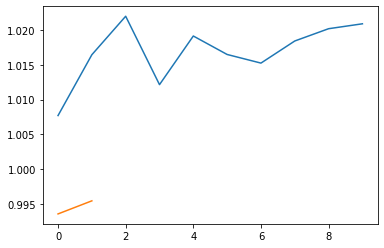

In [25]:
# close
plt.plot(np.cumprod(close_train+1), label="ass")
plt.plot(np.cumprod(close_test+1), label="dick")

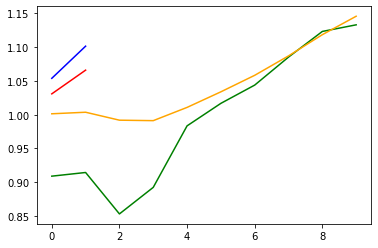

In [26]:
# macd
plt.plot(np.cumprod(macd_train+1), color="green")
plt.plot(np.cumprod(signal_train+1), color="orange")
# test
plt.plot(np.cumprod(macd_test+1), color="blue")
plt.plot(np.cumprod(signal_test+1), color="red")

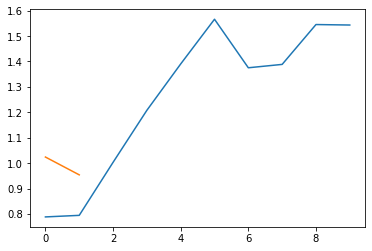

In [27]:
# MFI
plt.plot(np.cumprod(mfi_train+1))
plt.plot(np.cumprod(mfi_test+1))

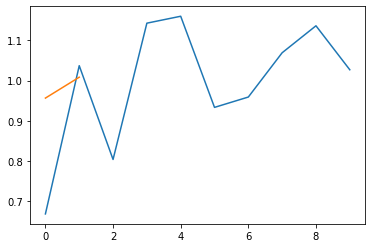

In [28]:
# stochastic oscillator  
plt.plot(np.cumprod(stoch_train+1))
plt.plot(np.cumprod(stoch_test+1))

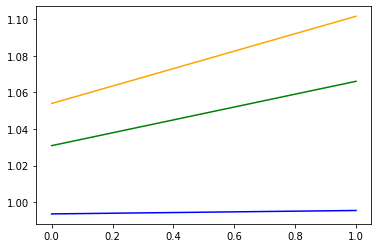

In [29]:
# macd and signal + close w/ volume
plt.plot(np.cumprod(close_test+1), color="blue")
plt.plot(np.cumprod(macd_test+1), color="orange")
plt.plot(np.cumprod(signal_test+1), color="green")
# plt.plot(np.cumprod(volume_test+1), color="black")

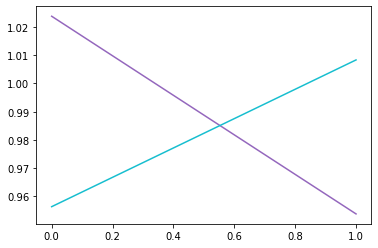

In [30]:
# stoch + mfi w/ volume
plt.plot(np.cumprod(mfi_test+1), color="#9467bd")
plt.plot(np.cumprod(stoch_test+1), color="#17becf")
# plt.plot(np.cumprod(volume_test+1), color="black")

In [31]:
print("close test:", close_test[-1], " current close:", n_indicators["close"].iloc[-1])
print("macd test:", macd_test[-1], " current macd:", n_indicators["macd"].iloc[-1])
print("signal test:", signal_test[-1], " current signal:", n_indicators["signal"].iloc[-1])
print("mfi test:", mfi_test[-1], " current mfi:", n_indicators["mfi"].iloc[-1])
print("stoch test:", stoch_test[-1], " current stoch:", n_indicators["stoch"].iloc[-1])
print("VZO test:", vzo_test[-1], " current VZO:", n_indicators["vzo"].iloc[-1])

close test: 0.0018893850910339993  current close: 58.33
macd test: 0.04520043711473222  current macd: 0.5508653372960453
signal test: 0.03409415756509466  current signal: 0.48668168221331143
mfi test: -0.06850760479099936  current mfi: 61.35296210134675
stoch test: 0.05445544554455416  current stoch: 85.54216867469879
VZO test: 0.23727011901601747  current VZO: 35.172737032511215


In [32]:
# print("sentiment:", sentiment)

In [33]:
print(n_indicators["macd"].iloc[-1] < n_indicators["signal"].iloc[-1])

False


In [34]:
print(bullish_sequence(n_indicators["macd"].iloc[-5], n_indicators["macd"].iloc[-4], n_indicators["macd"].iloc[-3]))

False


In [35]:
pattern = bullish_candlestick_patterns(n_indicators.iloc[-1], n_indicators.iloc[-2], n_indicators.iloc[-3])
print("Pattern: ", pattern, pattern in ["hammer", "inverseHammer"])

Pattern:  None False


In [36]:
# empyrical stuff
from empyrical import max_drawdown, cum_returns

test_drawdown = max_drawdown(cum_returns(n_indicators["close"]))
test_drawdown1 = max_drawdown(cum_returns(n1_indicators["close"]))
test_drawdown2 = max_drawdown(cum_returns(n2_indicators["close"]))
test_drawdown3 = max_drawdown(cum_returns(n3_indicators["close"]))
test_drawdown4 = max_drawdown(cum_returns(n4_indicators["close"]))

/home/ben/anaconda3/envs/alpaca_test/lib/python3.7/site-packages/empyrical/stats.py:394: RuntimeWarning:

invalid value encountered in subtract



In [40]:
asdf = cum_returns(n_indicators["close"])

max_drawdown(asdf)

0.0